In [3]:
import pandas as pd

In [4]:
df = pd.read_excel('/content/Canciones2.xlsx')

print(df)


FileNotFoundError: [Errno 2] No such file or directory: '/content/Canciones2.xlsx'

In [ ]:
df.head()

,Año,Canción,Artista,PlayList,Letra
0,2010,Hasta Abajo,Don Omar,Latin Hits 2010 by Spotify,"D, d, d\nAsí hasta abajo soy yo (D, d, d, D. O..."
1,2010,Niña Bonita,Chino & Nacho,Latin Hits 2010 by Spotify,Richi peña\nChino y nacho\nEsta cancion nació ...
2,2010,Como Has Logrado,Vicente Garcia,Latin Hits 2010 by Spotify,La esperanza se marchó\nMas bien me abandonó\n...
3,2010,Taboo,Don Omar,Latin Hits 2010 by Spotify,Bahía Azulada)\nNo llores por él\n(No llores p...
4,2010,Me Enamoré,Angel y Khriz,Latin Hits 2010 by Spotify,"Hola que tal, como estas? que te trae por aqui..."


In [8]:
pip install sentence_transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 15.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
from sentence_transformers import SentenceTransformer

# Load the dataset
df = pd.read_excel('/content/Canciones2.xlsx')

# Initialize the multilingual E5 model
model = SentenceTransformer('intfloat/multilingual-e5-large-instruct')

# Define a function to create a combined text for each row to generate embeddings
def create_input_text(row):
    return f"Cancion: {row['Canción']}, Artista: {row['Artista']}, Letra: {row['Letra']}"

# Create a new column with the combined text for each row
df['combined_text'] = df.apply(create_input_text, axis=1)

# Generate embeddings for each row
embeddings = model.encode(df['combined_text'].tolist(), convert_to_tensor=False, normalize_embeddings=True)

# Add the embeddings to the dataframe
df['embeddings'] = embeddings.tolist()

# Drop the 'combined_text' column as it's no longer needed
df = df.drop(columns=['combined_text'])

# Save the dataframe with embeddings to a new Parquet file
df.to_parquet('/content/Canciones2_with_embeddings.parquet', index=False)

print("Embeddings generated and saved successfully.")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/128 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/140k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/690 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.1M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/964 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/271 [00:00<?, ?B/s]

Embeddings generated and saved successfully.


Este código carga un dataset de canciones y genera embeddings utilizando el modelo 'multilingual-e5-large-instruct'. Primero, se combinan varias columnas del dataset (canción, artista, y letra) para crear una representación de texto para cada fila. Luego, se utilizan estos textos para generar embeddings mediante el modelo preentrenado de Sentence Transformers. Los embeddings generados se almacenan en un archivo Parquet para su posterior uso.

El modelo 'multilingual-e5-large-instruct' fue elegido porque es uno de los mejores modelos para la creación de embeddings según el Massive Text Embedding Benchmark (MTEB) Leaderboard. Para más información, se puede consultar el repositorio de MTEB en GitHub.


In [2]:
df = pd.read_parquet('/content/Canciones2_with_embeddings (2).parquet')

In [6]:
df.head()

,Año,Canción,Artista,PlayList,Letra,embeddings
0,2010,Hasta Abajo,Don Omar,Latin Hits 2010 by Spotify,"D, d, d\nAsí hasta abajo soy yo (D, d, d, D. O...","[0.02217687852680683, 0.006155426613986492, -0..."
1,2010,Niña Bonita,Chino & Nacho,Latin Hits 2010 by Spotify,Richi peña\nChino y nacho\nEsta cancion nació ...,"[0.015296516939997673, 0.02276044897735119, -0..."
2,2010,Como Has Logrado,Vicente Garcia,Latin Hits 2010 by Spotify,La esperanza se marchó\nMas bien me abandonó\n...,"[0.028835298493504524, 0.027870627120137215, -..."
3,2010,Taboo,Don Omar,Latin Hits 2010 by Spotify,Bahía Azulada)\nNo llores por él\n(No llores p...,"[0.03443495184183121, 0.02645573392510414, -0...."
4,2010,Me Enamoré,Angel y Khriz,Latin Hits 2010 by Spotify,"Hola que tal, como estas? que te trae por aqui...","[0.038124654442071915, 0.027006767690181732, -..."


/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


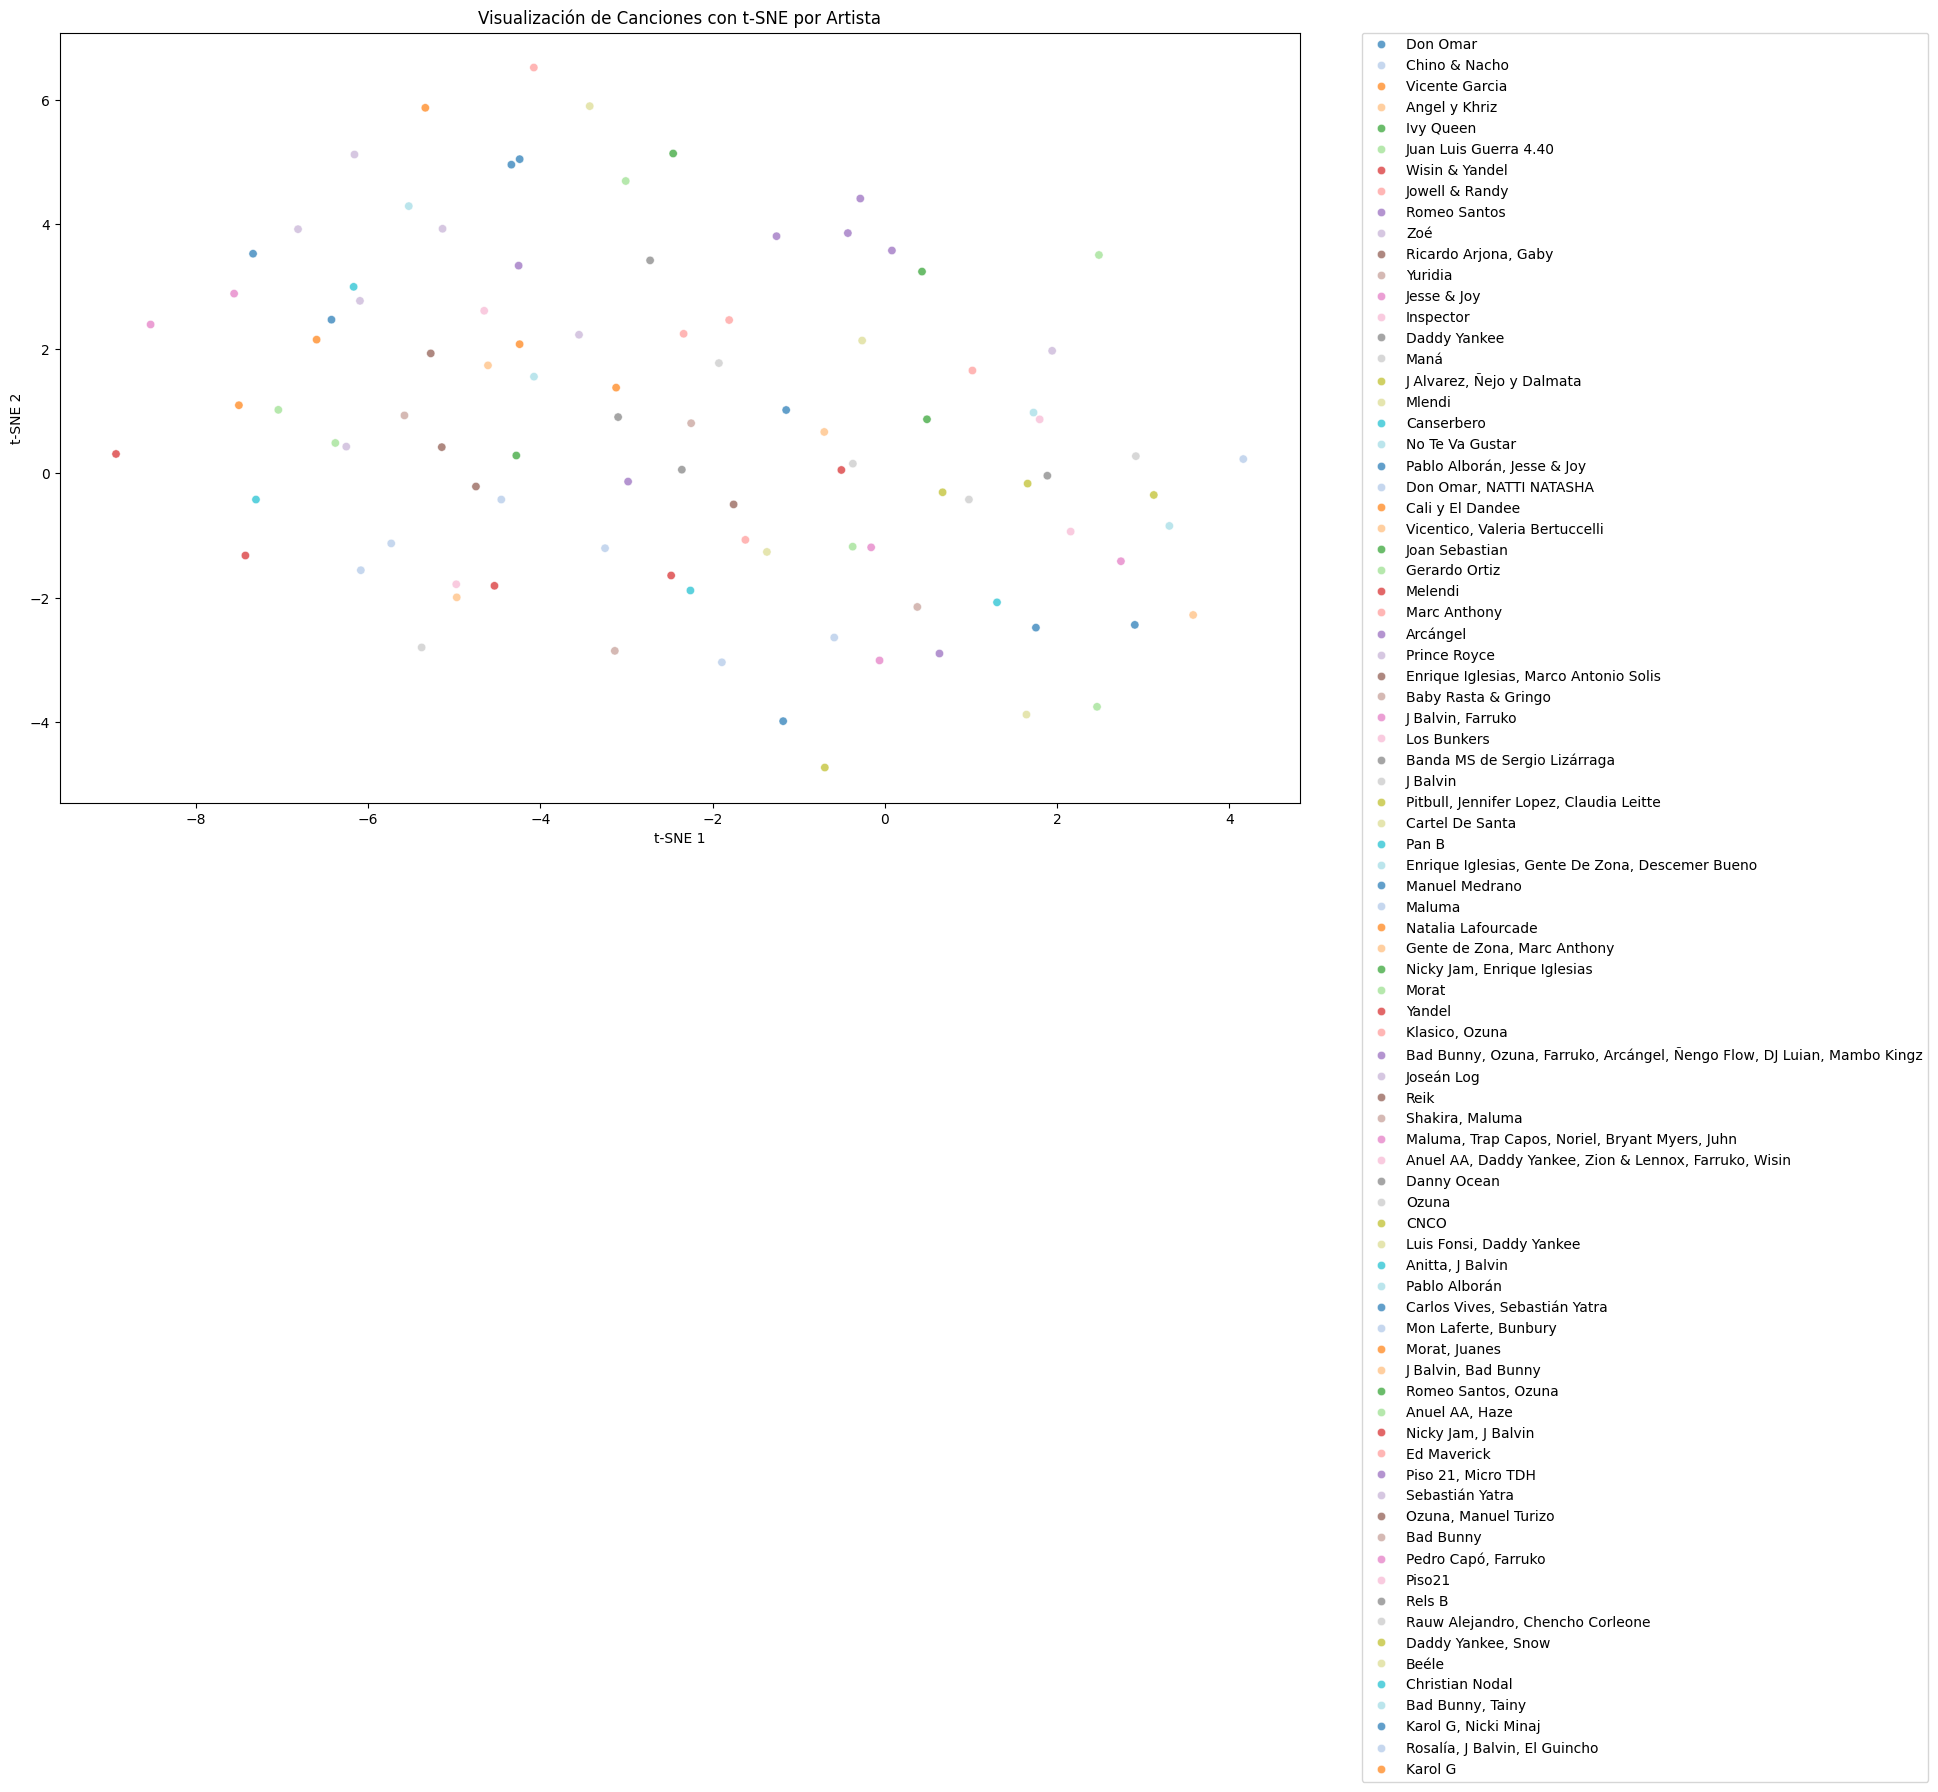

In [11]:
import pandas as pd
import numpy as np
from sentence_transformers import SentenceTransformer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# 2. Extraer los embeddings
embeddings = np.array(df['embeddings'].tolist())

# 3. Aplicar t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000, metric='cosine')
tsne_results = tsne.fit_transform(embeddings)
df['tsne_1'] = tsne_results[:,0]
df['tsne_2'] = tsne_results[:,1]

# 4. Visualización con Seaborn
plt.figure(figsize=(16,10))
sns.scatterplot(
    x='tsne_1', y='tsne_2',
    hue='Artista',  # Cambia según tu dataset
    palette='tab20',
    data=df,
    legend='full',
    alpha=0.7
)
plt.title('Visualización de Canciones con t-SNE por Artista')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# 5. Visualización Interactiva con Plotly
fig = px.scatter(
    df, x='tsne_1', y='tsne_2',
    color='Artista',  # Cambia según tu dataset
    hover_data=['Canción', 'Artista'],
    title='Visualización Interactiva de Canciones con t-SNE'
)
fig.show()

In [15]:
pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 5.1 MB/s eta 0:00:00


Resultados del Método del Codo y Silhouette Score:
 Número de Clusters  Inercia (Codo)  Silhouette Score
                  2    98498.245071          0.027860
                  3    97085.928471          0.018164
                  4    95711.135320          0.011660
                  5    94689.951971          0.007686
                  6    93235.770284          0.006893
                  7    92120.038245          0.003282
                  8    90064.979747          0.005092
                  9    88891.418244          0.003926
                 10    87670.065881          0.003706
                 11    85977.805757          0.006126
                 12    84651.728315          0.006112
                 13    83353.312831          0.007810
                 14    81627.540995          0.010871
                 15    80696.115357          0.008391
                 16    79357.794007          0.008565
                 17    78155.243767          0.009081
                 18    76849.98

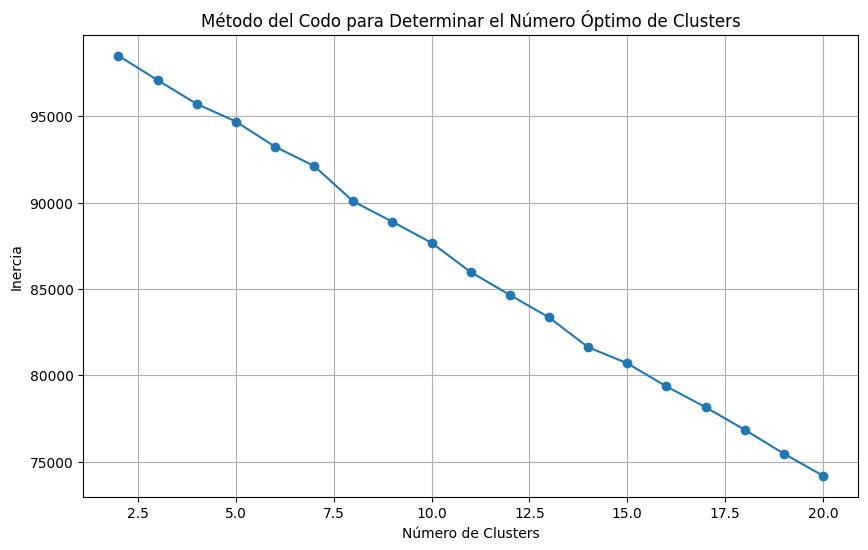

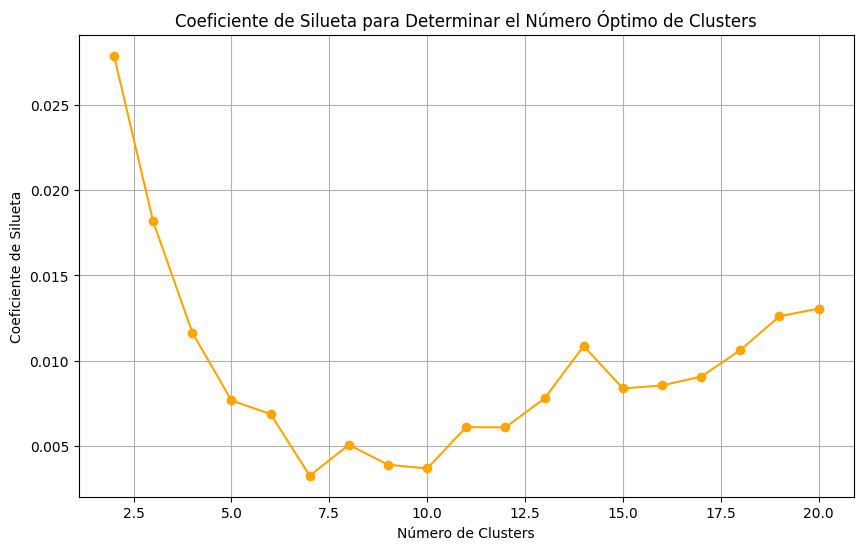

In [18]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Supongamos que 'df' es tu DataFrame que ya contiene la columna 'embeddings'
# Asegúrate de tener 'df' definido antes de ejecutar este código

# 2. Extraer y estandarizar los embeddings
embeddings = np.array(df['embeddings'].tolist())
scaler = StandardScaler()
embeddings_scaled = scaler.fit_transform(embeddings)

# 3. Determinar el número óptimo de clusters usando el método del codo y Silhouette Score
range_n_clusters = list(range(2, 21))
inertia = []
silhouette_scores = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(embeddings_scaled)
    inertia.append(kmeans.inertia_)
    cluster_labels = kmeans.predict(embeddings_scaled)
    silhouette_avg = silhouette_score(embeddings_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Crear un DataFrame con los resultados
resultados = pd.DataFrame({
    'Número de Clusters': range_n_clusters,
    'Inercia (Codo)': inertia,
    'Silhouette Score': silhouette_scores
})

# Imprimir los resultados en formato tabular
print("Resultados del Método del Codo y Silhouette Score:")
print(resultados.to_string(index=False))

# Guardar los resultados en un archivo CSV
resultados.to_csv('resultados_clustering.csv', index=False)
print("\nLos resultados han sido guardados en 'resultados_clustering.csv'.")

# Plotear el método del codo
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, inertia, marker='o')
plt.title('Método del Codo para Determinar el Número Óptimo de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Inercia')
plt.grid(True)
plt.show()

# Plotear el coeficiente de silueta
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o', color='orange')
plt.title('Coeficiente de Silueta para Determinar el Número Óptimo de Clusters')
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente de Silueta')
plt.grid(True)
plt.show()



De acuerdo a esto no se pueden hacer lceuters bien definidos.

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



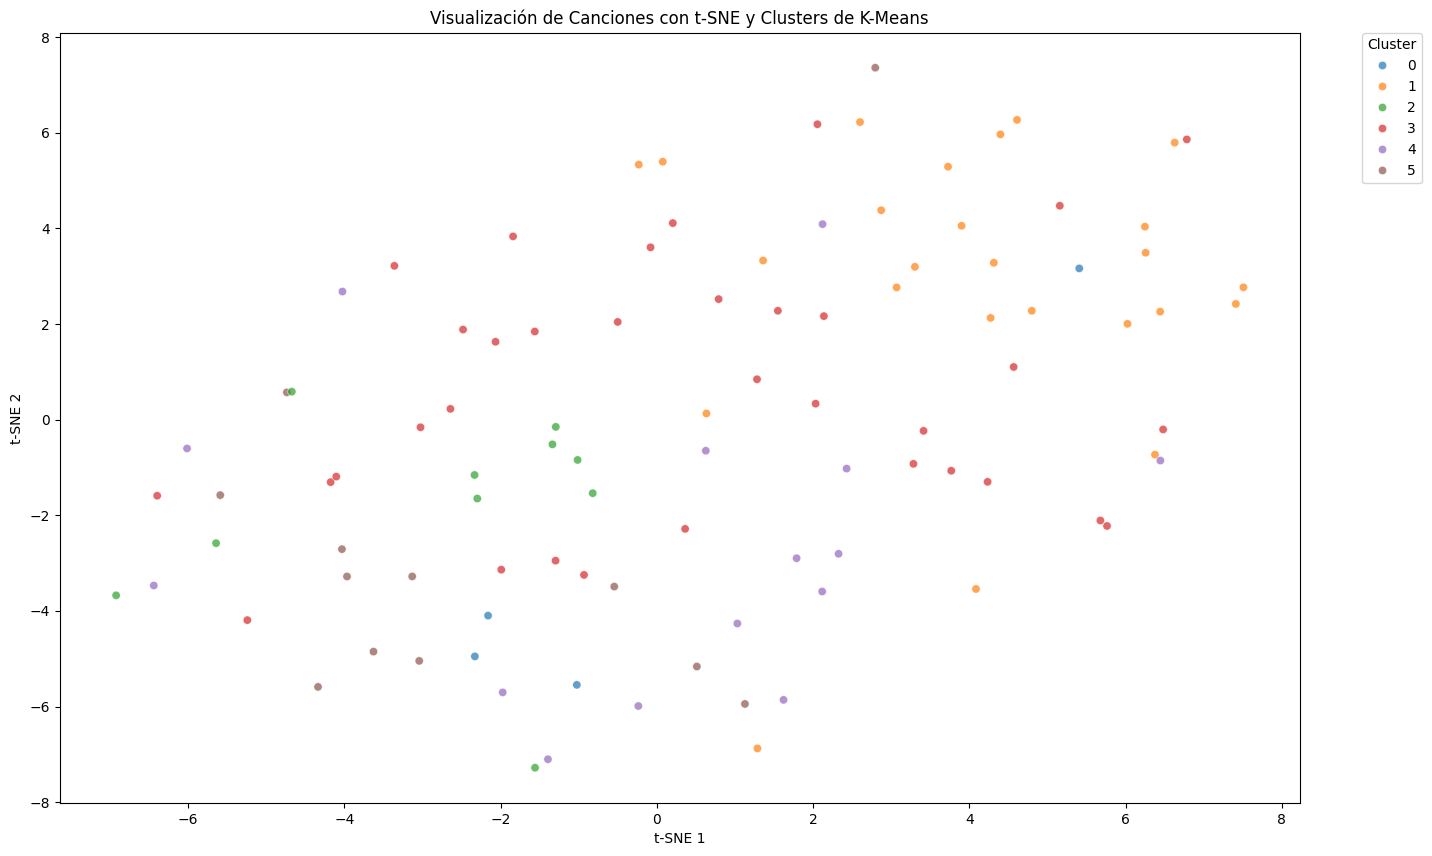

cluster
0     4
1    25
2    10
3    34
4    15
5    12
Name: count, dtype: int64

Cluster 0:


,Canción,Artista
11,Labios Rotos,Zoé
37,Arrullo De Estrellas,Zoé
39,Flor Pálida,Marc Anthony
88,Calma Remix,"Pedro Capó, Farruko"



Cluster 1:


,Canción,Artista
0,Hasta Abajo,Don Omar
3,Taboo,Don Omar
6,Bachata En Fukuoka,Juan Luis Guerra 4.40
9,Loco,Jowell & Randy
16,Lovumba,Daddy Yankee



Cluster 2:


,Canción,Artista
4,Me Enamoré,Angel y Khriz
7,Estoy Enamorado,Wisin & Yandel
15,Me Estoy Enamorando,Inspector
17,Amor Clandestino,Maná
24,Dutty Love,"Don Omar, NATTI NATASHA"



Cluster 3:


,Canción,Artista
2,Como Has Logrado,Vicente Garcia
5,La Vida Es Así,Ivy Queen
10,La Diabla,Romeo Santos
12,Fuiste Tú (feat. Gaby Moreno),"Ricardo Arjona, Gaby"
13,Ya Te Olvidé,Yuridia



Cluster 4:


,Canción,Artista
1,Niña Bonita,Chino & Nacho
20,Tu Jardín Con Enanitos,Mlendi
21,Maquiavélico,Canserbero
40,Eres Mía,Romeo Santos
42,Háblame de Ti,Banda MS de Sergio Lizárraga



Cluster 5:


,Canción,Artista
8,Mi Bendición,Juan Luis Guerra 4.40
14,¡Corre!,Jesse & Joy
18,Soñé,Zoé
23,Donde Está El Amor (Feat Jesse & Joy,"Pablo Alborán, Jesse & Joy"
25,Yo Te Esperaré,Cali y El Dandee


Coeficiente de Silueta: 0.0069


In [6]:
# Supongamos que elegimos 10 clusters
n_clusters = 6
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df['cluster'] = kmeans.fit_predict(embeddings_scaled)

# 4. Aplicar t-SNE para reducir la dimensionalidad a 2D
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000, metric='cosine')
tsne_results = tsne.fit_transform(embeddings_scaled)
df['tsne_1'] = tsne_results[:, 0]
df['tsne_2'] = tsne_results[:, 1]

# 5. Visualización con Seaborn
plt.figure(figsize=(16, 10))
sns.scatterplot(
    x='tsne_1', y='tsne_2',
    hue='cluster',
    palette='tab10',
    data=df,
    legend='full',
    alpha=0.7
)
plt.title('Visualización de Canciones con t-SNE y Clusters de K-Means')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

# 6. Visualización Interactiva con Plotly
fig = px.scatter(
    df, x='tsne_1', y='tsne_2',
    color=df['cluster'].astype(str),
    hover_data=['Canción', 'Artista'],
    title='Visualización Interactiva de Canciones con t-SNE y Clusters de K-Means',
    labels={'color': 'Cluster'}
)
fig.show()

# 7. Análisis de los Clusters
# Contar el número de canciones por cluster
cluster_counts = df['cluster'].value_counts().sort_index()
print(cluster_counts)

# Mostrar algunas canciones de cada cluster
for cluster in range(n_clusters):
    print(f"\nCluster {cluster}:")
    display(df[df['cluster'] == cluster][['Canción', 'Artista']].head(5))

# 8. Validación de la Calidad de los Clusters
score = silhouette_score(embeddings_scaled, df['cluster'])
print(f'Coeficiente de Silueta: {score:.4f}')


Use model to name the clusters

In [13]:
from transformers import AutoModelForCausalLM, AutoTokenizer

model_name = "Qwen/Qwen2.5-7B-Instruct"

model = AutoModelForCausalLM.from_pretrained(
    model_name,
    torch_dtype="auto",
    device_map="auto"
)
tokenizer = AutoTokenizer.from_pretrained(model_name)

config.json:   0%|          | 0.00/663 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/27.8k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/3.95G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/3.86G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/3.86G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/3.56G [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/accelerate/utils/modeling.py:1462: UserWarning:

Current model requires 402656256 bytes of buffer for offloaded layers, which seems does not fit any GPU's remaining memory. If you are experiencing a OOM later, please consider using offload_buffers=True.



Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/243 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/7.30k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/2.78M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/1.67M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/7.03M [00:00<?, ?B/s]

In [14]:
def generate_cluster_description(lyrics):
    prompt = f"Given the following songs lyrics, provide a one-sentence description that captures the main theme or mood:\n\n{lyrics}\n\nOne-sentence description:"
    messages = [
        {"role": "system", "content": "You are a helpful assistant that provides concise descriptions of clusters of song themes. In SPANISH"},
        {"role": "user", "content": prompt}
    ]
    text = tokenizer.apply_chat_template(
        messages,
        tokenize=False,
        add_generation_prompt=True
    )
    model_inputs = tokenizer([text], return_tensors="pt").to(model.device)

    generated_ids = model.generate(
        **model_inputs,
        max_new_tokens=50,
        num_return_sequences=1,
        temperature=0.7
    )
    generated_ids = [
        output_ids[len(input_ids):] for input_ids, output_ids in zip(model_inputs.input_ids, generated_ids)
    ]

    description = tokenizer.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
    return description

In [15]:
# 7. Análisis de los Clusters y generación de descripciones
cluster_descriptions = {}
for cluster in range(n_clusters):
    print(f"\nCluster {cluster}:")
    cluster_songs = df[df['cluster'] == cluster]
    display(cluster_songs[['Canción', 'Artista']].head(5))

    # Concatenate lyrics from the first few songs in the cluster
    cluster_lyrics = " ".join(cluster_songs['Letra'].tolist())

    # Generate description
    description = generate_cluster_description(cluster_lyrics)
    cluster_descriptions[cluster] = description
    print(f"Cluster Description: {description}")

# Add descriptions to the dataframe
df['cluster_description'] = df['cluster'].map(cluster_descriptions)


Cluster 0:


,Canción,Artista
11,Labios Rotos,Zoé
37,Arrullo De Estrellas,Zoé
39,Flor Pálida,Marc Anthony
88,Calma Remix,"Pedro Capó, Farruko"


Cluster Description: Esta canción celebra el amor y la felicidad en la playa de Puerto Rico, mezclando imágenes de naturaleza y actividades caribeñas con momentos románticos y un ritmo alegre.

Cluster 1:


,Canción,Artista
0,Hasta Abajo,Don Omar
3,Taboo,Don Omar
6,Bachata En Fukuoka,Juan Luis Guerra 4.40
9,Loco,Jowell & Randy
16,Lovumba,Daddy Yankee


KeyboardInterrupt: 